# Import Libraries

In [1]:
from mimic.mimic import MIMIC, MIMICManipulations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('./dataset/ch_03_dataset.csv')
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,hospital_expire_flag,los_admission,gender,...,flag,priority,drg_type,drg_code,drug,route,org_name,test_name,ab_name,curr_service
0,ELECTIVE,Other,HOME,Other,ENGLISH,Other,WHITE,0.0,1.968056,M,...,normal,STAT,HCFA,795.0,Other,IM,None,"Blood Culture, Routine",None,NB
1,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0.0,2.222222,F,...,abnormal,ROUTINE,HCFA,442.0,Influenza Vaccine Quadrivalent,IM,None,Other,None,MED
2,ELECTIVE,Other,HOME,Other,ENGLISH,Other,ASIAN,0.0,1.865278,F,...,normal,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,None,Other,None,NB
3,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0.0,0.298611,F,...,normal,OTHER,OTHER,0.0,None,None,None,None,None,MED
4,ELECTIVE,Other,HOME,Other,ENGLISH,Other,WHITE,0.0,4.109722,M,...,normal,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,None,None,None,NB


In [3]:
df.columns

Index(['admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'marital_status', 'ethnicity',
       'hospital_expire_flag', 'los_admission', 'gender', 'anchor_age',
       'eventtype', 'flag', 'priority', 'drg_type', 'drg_code', 'drug',
       'route', 'org_name', 'test_name', 'ab_name', 'curr_service'],
      dtype='object')

In [4]:
df.drg_code.values.tolist()

[795.0,
 442.0,
 795.0,
 0.0,
 795.0,
 57.0,
 0.0,
 482.0,
 795.0,
 0.0,
 0.0,
 794.0,
 658.0,
 0.0,
 794.0,
 775.0,
 513.0,
 795.0,
 154.0,
 794.0,
 795.0,
 432.0,
 885.0,
 0.0,
 0.0,
 330.0,
 292.0,
 0.0,
 765.0,
 908.0,
 23.0,
 795.0,
 795.0,
 775.0,
 329.0,
 655.0,
 795.0,
 775.0,
 281.0,
 794.0,
 103.0,
 92.0,
 982.0,
 794.0,
 0.0,
 54.0,
 303.0,
 375.0,
 795.0,
 0.0,
 502.0,
 683.0,
 66.0,
 794.0,
 621.0,
 792.0,
 176.0,
 963.0,
 795.0,
 765.0,
 795.0,
 0.0,
 25.0,
 0.0,
 794.0,
 871.0,
 352.0,
 314.0,
 270.0,
 236.0,
 887.0,
 774.0,
 419.0,
 72.0,
 552.0,
 923.0,
 795.0,
 392.0,
 0.0,
 220.0,
 264.0,
 774.0,
 563.0,
 0.0,
 765.0,
 743.0,
 881.0,
 501.0,
 165.0,
 327.0,
 0.0,
 794.0,
 494.0,
 0.0,
 793.0,
 66.0,
 0.0,
 696.0,
 457.0,
 794.0,
 310.0,
 795.0,
 349.0,
 512.0,
 603.0,
 85.0,
 795.0,
 795.0,
 0.0,
 795.0,
 871.0,
 30.0,
 765.0,
 194.0,
 777.0,
 811.0,
 234.0,
 307.0,
 987.0,
 748.0,
 0.0,
 0.0,
 253.0,
 207.0,
 70.0,
 373.0,
 236.0,
 795.0,
 795.0,
 795.0,
 0.0,
 0.0,

In [5]:
df.drg_code.dtype

dtype('float64')

In [6]:
df.drg_code.describe()

count    256796.000000
mean        466.327186
std         322.297600
min           0.000000
25%         176.000000
50%         472.000000
75%         794.000000
max         999.000000
Name: drg_code, dtype: float64

In [7]:
df.test_name.value_counts()

None                        83079
URINE CULTURE               58901
Blood Culture, Routine      34109
Other                       27219
MRSA SCREEN                 23028
Blood Culture, Neonate      11207
WOUND CULTURE                6335
Staph aureus Screen          4438
RAPID PLASMA REAGIN TEST     3576
GRAM STAIN                   2815
FLUID CULTURE                2089
Name: test_name, dtype: int64

In [8]:
df.anchor_age.describe()

count    256796.000000
mean         42.288708
std          29.397485
min           0.000000
25%          19.000000
50%          47.000000
75%          66.000000
max          91.000000
Name: anchor_age, dtype: float64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
# Take anchor age, los_admission, drg_code, test_name

In [12]:
df = df[['anchor_age', 'drg_code', 'los_admission', 'test_name']]
df.head()

,anchor_age,drg_code,los_admission,test_name
0,0.0,795.0,1.968056,"Blood Culture, Routine"
1,52.0,442.0,2.222222,Other
2,0.0,795.0,1.865278,Other
3,19.0,0.0,0.298611,None
4,0.0,795.0,4.109722,None


In [13]:
df.test_name = le.fit_transform(df.test_name)

In [14]:
df.head()

,anchor_age,drg_code,los_admission,test_name
0,0.0,795.0,1.968056,1
1,52.0,442.0,2.222222,6
2,0.0,795.0,1.865278,6
3,19.0,0.0,0.298611,5
4,0.0,795.0,4.109722,5


In [15]:
le.classes_

array(['Blood Culture, Neonate', 'Blood Culture, Routine',
       'FLUID CULTURE', 'GRAM STAIN', 'MRSA SCREEN', 'None', 'Other',
       'RAPID PLASMA REAGIN TEST', 'Staph aureus Screen', 'URINE CULTURE',
       'WOUND CULTURE'], dtype=object)

# Training and Visualizing a Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
X = df[['los_admission', 'anchor_age']].to_numpy()
y = df['test_name'].to_numpy()

In [18]:
print(type(X))

<class 'numpy.ndarray'>


In [19]:
print((type(y)))

<class 'numpy.ndarray'>


In [20]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [21]:
from sklearn import tree

In [22]:
df.columns[1:3].tolist()

['drg_code', 'los_admission']

In [23]:
set(df.test_name)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

[Text(0.5, 0.8333333333333334, 'los_admission <= 9.0\ngini = 0.803\nsamples = 256796\nvalue = [11207, 34109, 2089, 2815, 23028, 83079, 27219, 3576\n4438, 58901, 6335]\nclass = None'),
 Text(0.25, 0.5, 'drg_code <= 5.232\ngini = 0.594\nsamples = 60812\nvalue = [11204, 89, 23, 43, 12949, 34726, 1491, 7, 0, 179\n101]\nclass = None'),
 Text(0.125, 0.16666666666666666, 'gini = 0.543\nsamples = 54301\nvalue = [6664, 51, 3, 13, 12486, 33837, 1045, 7, 0, 143, 52]\nclass = None'),
 Text(0.375, 0.16666666666666666, 'gini = 0.485\nsamples = 6511\nvalue = [4540, 38, 20, 30, 463, 889, 446, 0, 0, 36, 49]\nclass = Blood Culture, Neonate'),
 Text(0.75, 0.5, 'los_admission <= 65.5\ngini = 0.797\nsamples = 195984\nvalue = [3, 34020, 2066, 2772, 10079, 48353, 25728, 3569, 4438\n58722, 6234]\nclass = URINE CULTURE'),
 Text(0.625, 0.16666666666666666, 'gini = 0.801\nsamples = 128746\nvalue = [1, 20627, 1315, 1855, 6009, 35975, 20284, 2968, 2258\n33079, 4375]\nclass = None'),
 Text(0.875, 0.1666666666666666

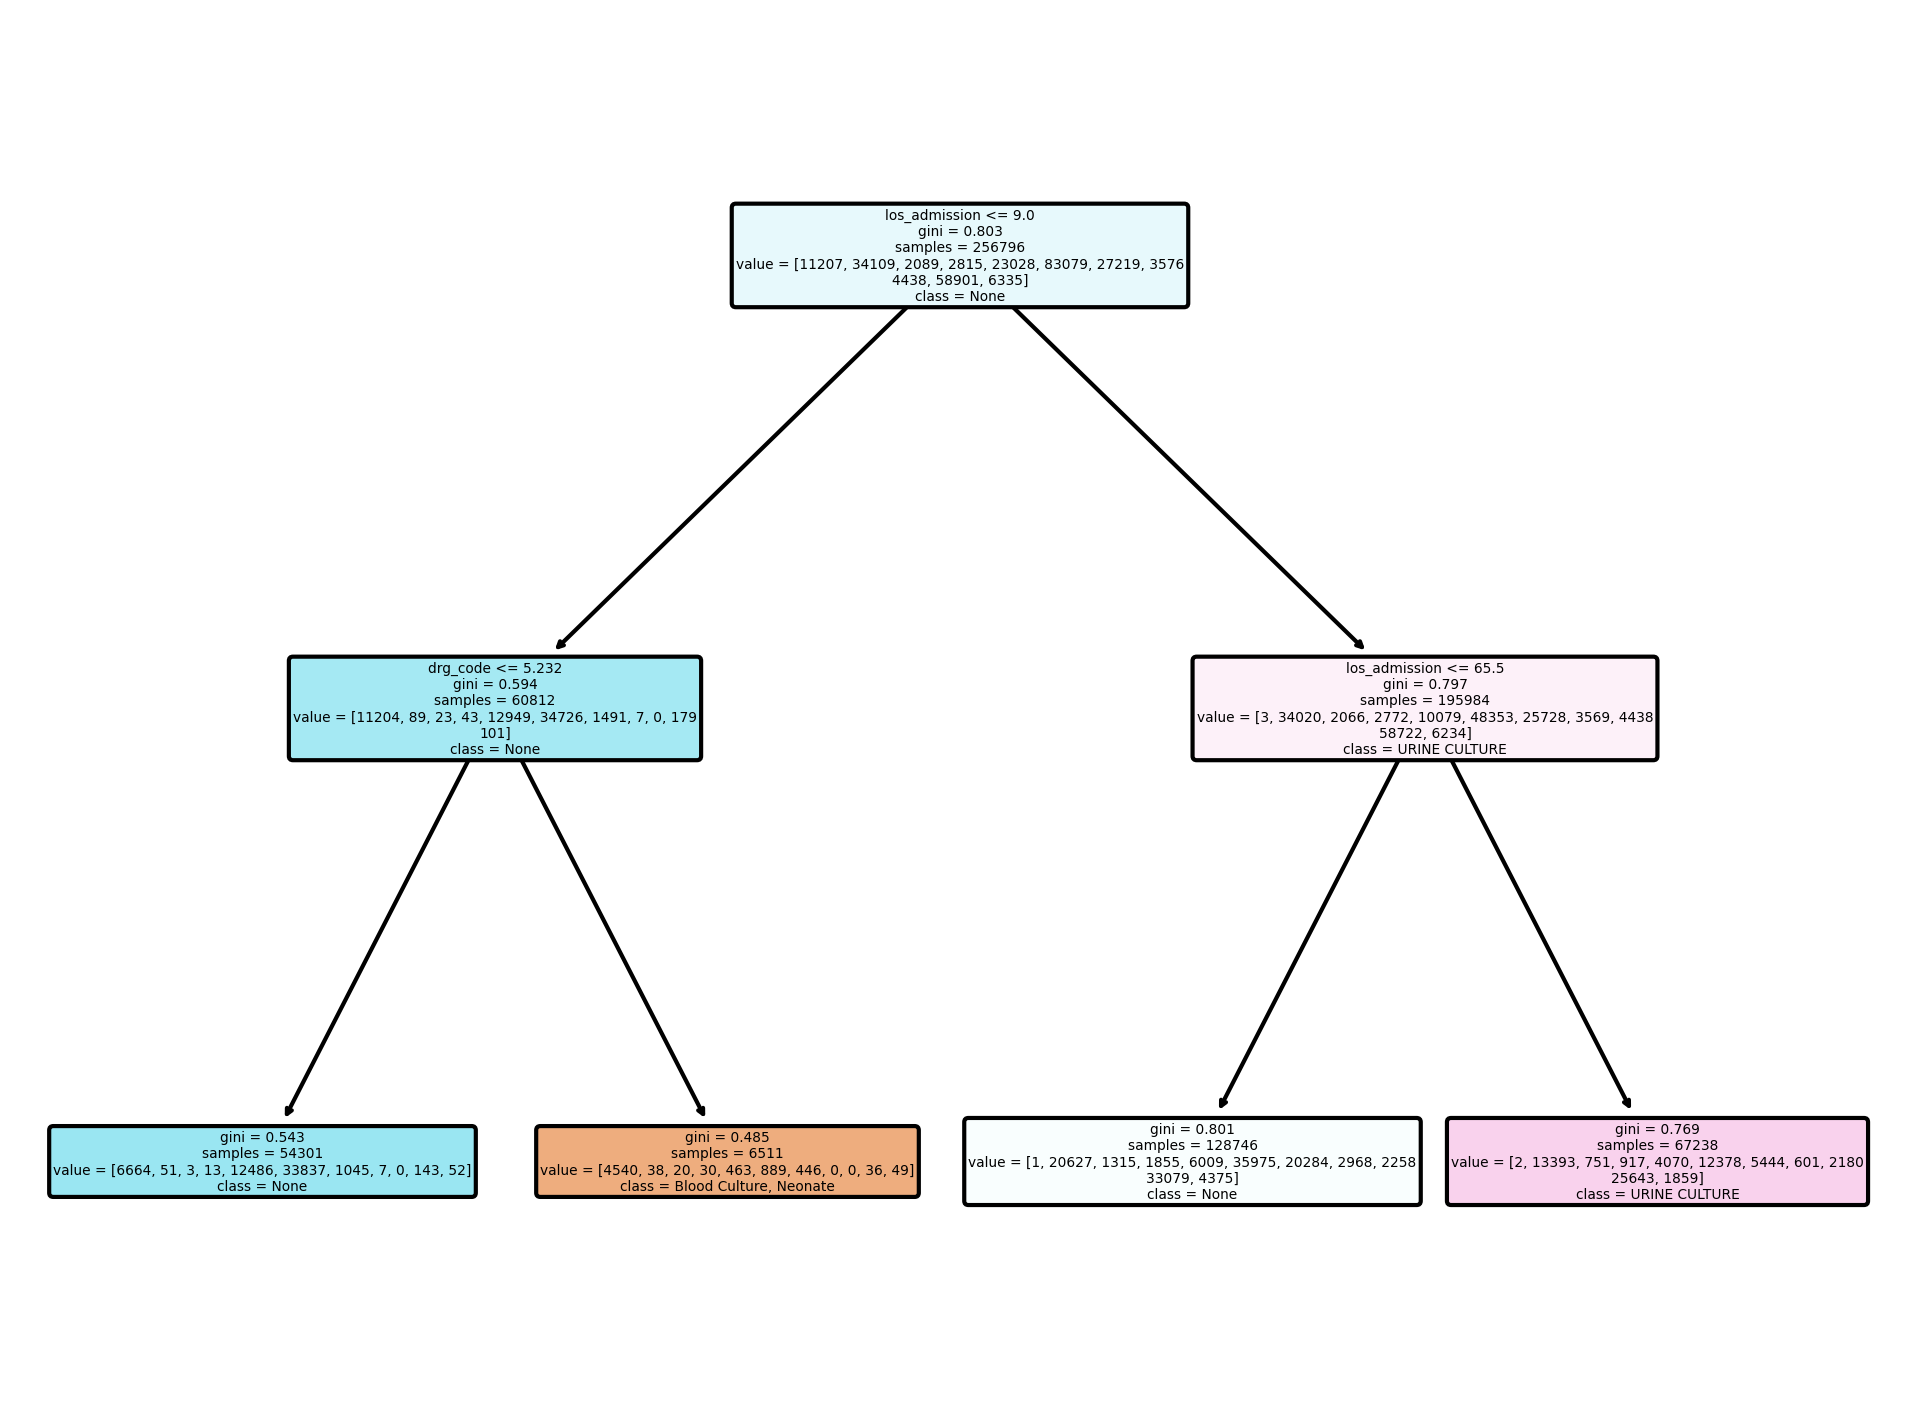

In [24]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,6), dpi=300)
tree.plot_tree(
        tree_clf,
        feature_names= df.columns[1:3].tolist(),
        class_names=le.classes_,
        rounded=True,
        filled=True
)

## Making Predictions

In [25]:
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

get_integer_mapping(le)

{'Blood Culture, Neonate': 0,
 'Blood Culture, Routine': 1,
 'FLUID CULTURE': 2,
 'GRAM STAIN': 3,
 'MRSA SCREEN': 4,
 'None': 5,
 'Other': 6,
 'RAPID PLASMA REAGIN TEST': 7,
 'Staph aureus Screen': 8,
 'URINE CULTURE': 9,
 'WOUND CULTURE': 10}

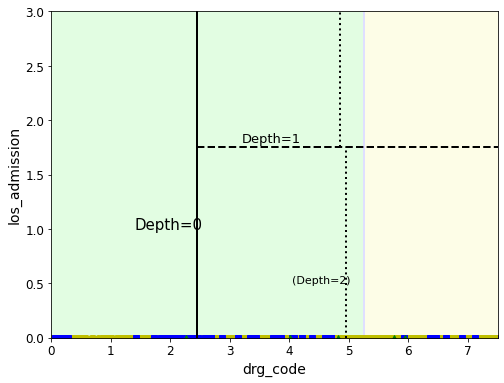

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], mimic=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Blood Culture, Neonate")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Blood Culture, Routine")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="FLUID CULTURE")
        plt.axis(axes)
    if mimic:
        plt.xlabel("drg_code", fontsize=14)
        plt.ylabel("los_admission", fontsize=14)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 6))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Estimating Class Probabilities

In [27]:
tree_clf.predict_proba([X[482]])

array([[7.76723160e-06, 1.60214686e-01, 1.02139096e-02, 1.44082146e-02,
        4.66732947e-02, 2.79426157e-01, 1.57550526e-01, 2.30531434e-02,
        1.75384090e-02, 2.56932254e-01, 3.39816383e-02]])

In [28]:
tree_clf.predict([X[482]])

array([5])

In [29]:
y[482]

5

## Regularization Hyperparameters

We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree.
Now let's show that training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. To show this, we will set `random_state` to a different value than earlier:

In [30]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

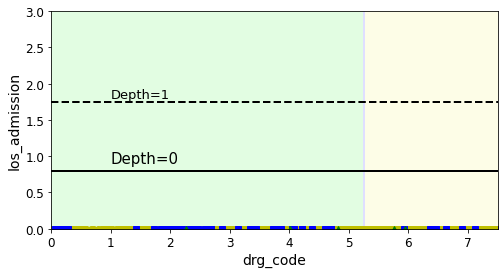

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

# Regression

In [55]:
X = df[['drg_code', 'anchor_age']].values
y = df['los_admission'].values

In [56]:
X

array([[795.,   0.],
       [442.,  52.],
       [795.,   0.],
       ...,
       [904.,  46.],
       [ 65.,  58.],
       [ 64.,  57.]])

In [57]:
y

array([ 1.96805556,  2.22222222,  1.86527778, ..., 17.07430556,
        6.99652778,  8.63819444])

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

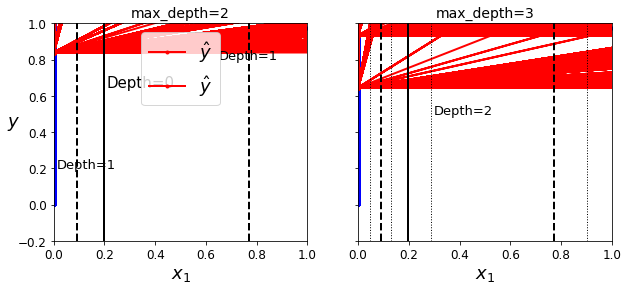

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    np.random.shuffle(X)
    x1 = X[:500, :]
    y_pred = tree_reg.predict(X)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(X, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

#save_fig("tree_regression_plot")
plt.show()

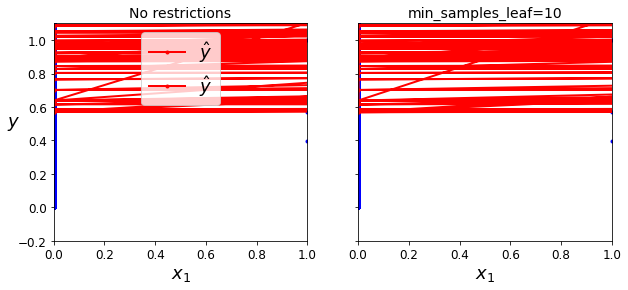

In [60]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

#x1 = np.linspace(0, 1, 500).reshape(-1, 1)
#x1 = X[np.random.choice(X.shape[0], 500, replace=False)]
np.random.shuffle(X)
x1 = X[:500, :]
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

#save_fig("tree_regression_regularization_plot")
plt.show()